## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


## Attribute Information:

For more information, read [Cho et al, 2020].

- station - used weather station number: 1 to 25
- Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


## Dataset Link-
• https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 7752
No of Columns: 25


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Comment :
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.

In [4]:
# Date column is act as object, so convert it into datetime datatype.
df['Date']=pd.to_datetime(df['Date'])

### Extracting Date,Month and Year from Date column

In [5]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [6]:
df.drop(columns=['Date'],inplace=True)

## Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [7]:
df.duplicated().sum()

0

## Let check if any whitespace, 'NA' or '-' exist in dataset.

In [8]:
df.isin([' ','NA','-']).sum().any()

False

#### Comment:
1. No Duplicate entry in dataset.
2. No whitespace, NA, '-' exist in dataset.

## Null value

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_PPT1                    75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT3                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC3                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
Present_Tmax                  70        0.902993
Present_Tmin                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Month                          2        0.025800
Day                 

# Handling Null Values.
## Filling Null Values with Zeros.

In [10]:
# filling nulls with zeros because dataset have numerical values.
df.fillna(0, inplace=True)

In [11]:
# Again checking NUll values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

## Comment -
* Null problem is shorted.

# Univariate Analysis

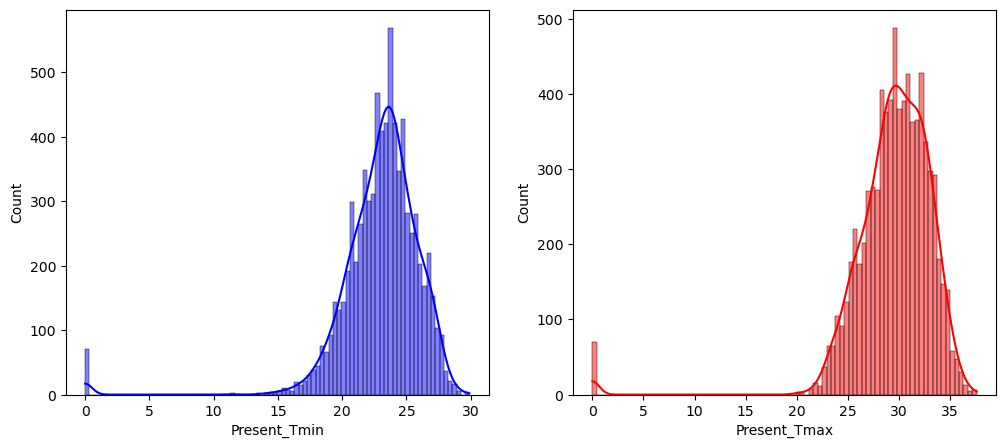

In [12]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.show()

Comment-
* Maximum Temperature is in range of ('21 - 38').
* Minimum Temeperature is in range of ('14 - 30')

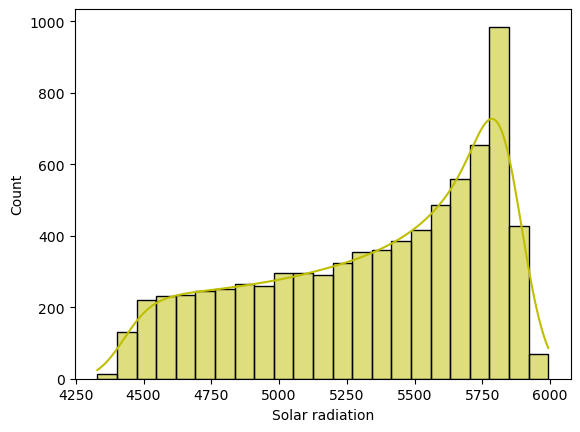

In [13]:
sns.histplot(df['Solar radiation'],kde=True,color='y')
plt.show()

* Solar radiation range is (4250 - 6000)

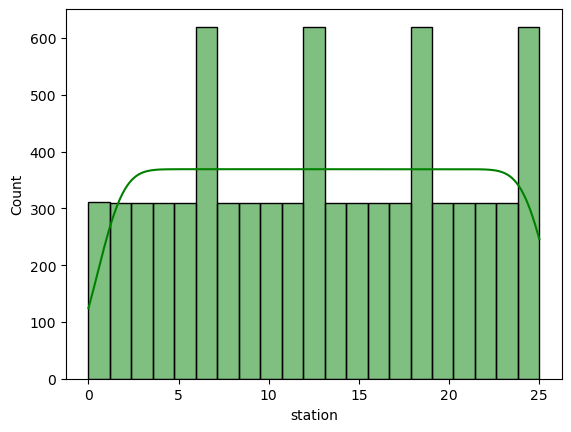

In [14]:
sns.histplot(df['station'],kde=True,color='g')
plt.show()

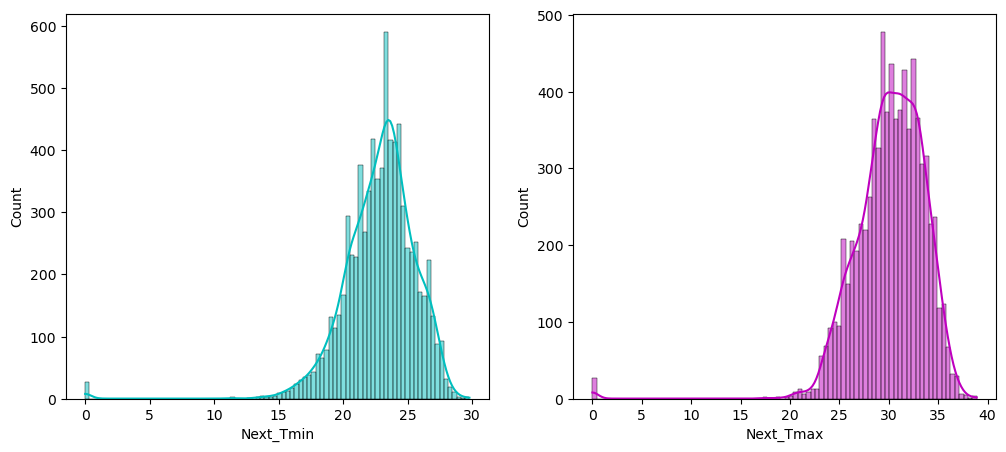

In [15]:
# Plotting histogram for NEXT_Tmax and NEXT_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmin'],kde=True,color='c')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmax'],kde=True,color='m')
plt.show()

Comment-
* Next Day Maximum Temperature is in range of ('19 - 38').
* Next Day Minimum Temeperature is in range of ('13 - 30')

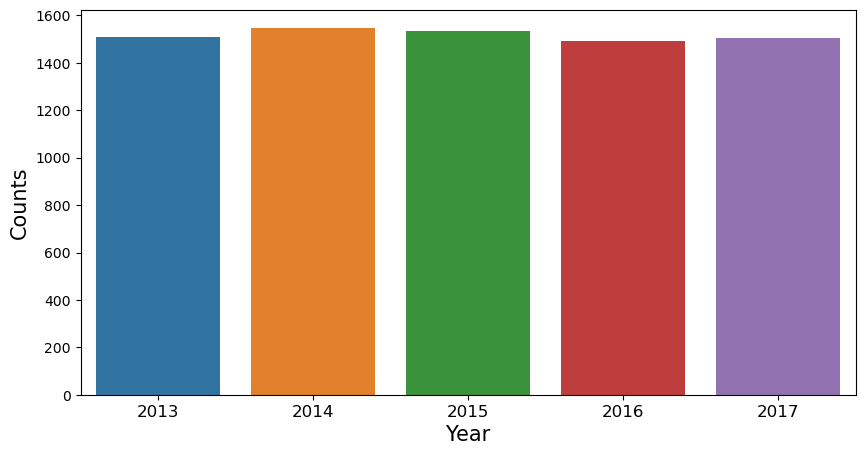

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks( fontsize=12)
plt.show()

* Ratio of Average Temperature is Equal in Every Year.

# Bivariate Analysis

* Temperature variation between Present Tmax And Tmin

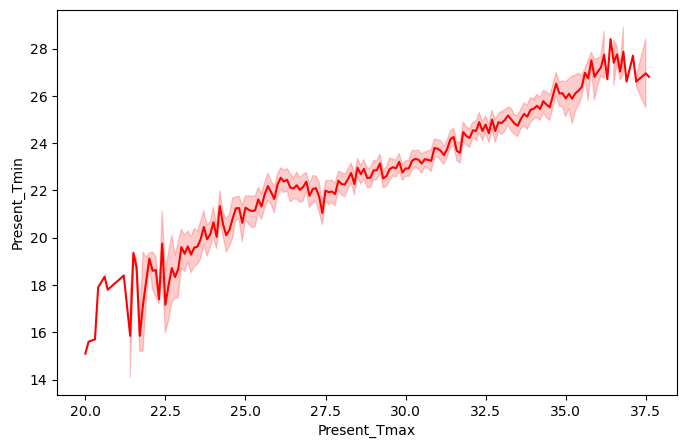

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Present_Tmax', y='Present_Tmin',color='r')
plt.show()

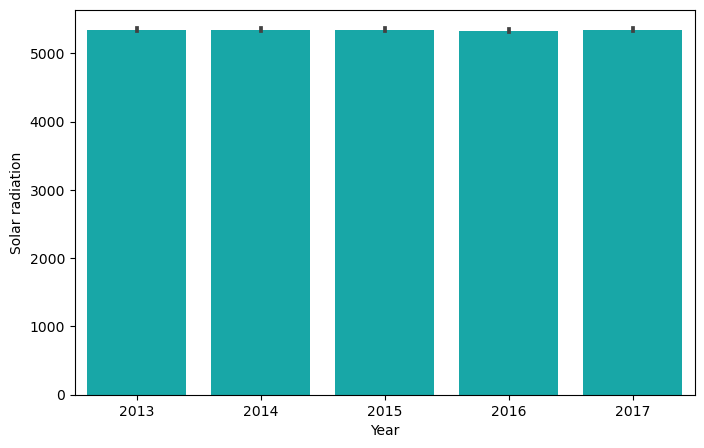

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, y='Solar radiation',x='Year',color='c')
plt.show()

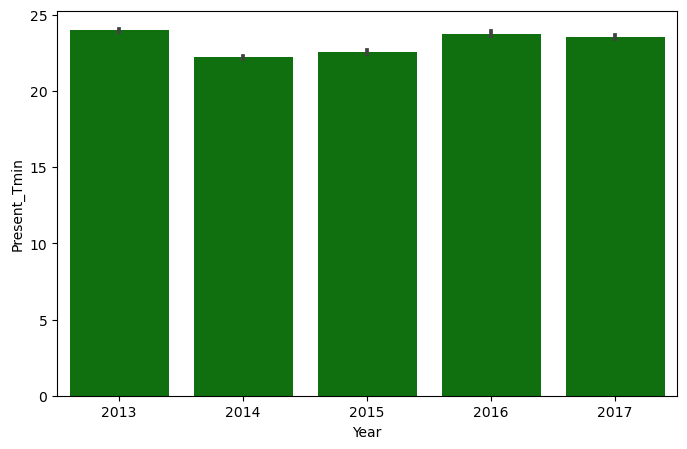

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='Year', y='Present_Tmin',color='g')
plt.show()

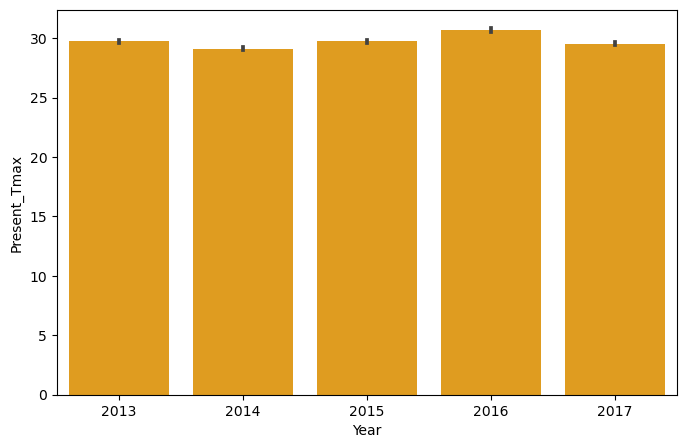

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='Year', y='Present_Tmax',color='orange')
plt.show()

# Statistical Analysis

In [16]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996646,29.499407,23.015338,56.210230,87.519784,29.326939,23.285106,7.029203,61.900288,0.365206,0.352635,0.315323,0.296297,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.169440,22.852348,15.979747,7.465815,2014.480134
std,7.213660,4.083116,3.256071,15.618676,11.227876,4.123757,3.277967,2.281613,34.120103,0.263668,0.259164,0.251090,0.254803,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.596114,2.827042,8.921191,0.543661,32.394355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,27.700000,21.600000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,0.136090,0.097389,0.077967,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,0.309148,0.258831,0.224420,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000


* We can see that there is high possibility of outlier existence.

# Correlation between Data

<Axes: >

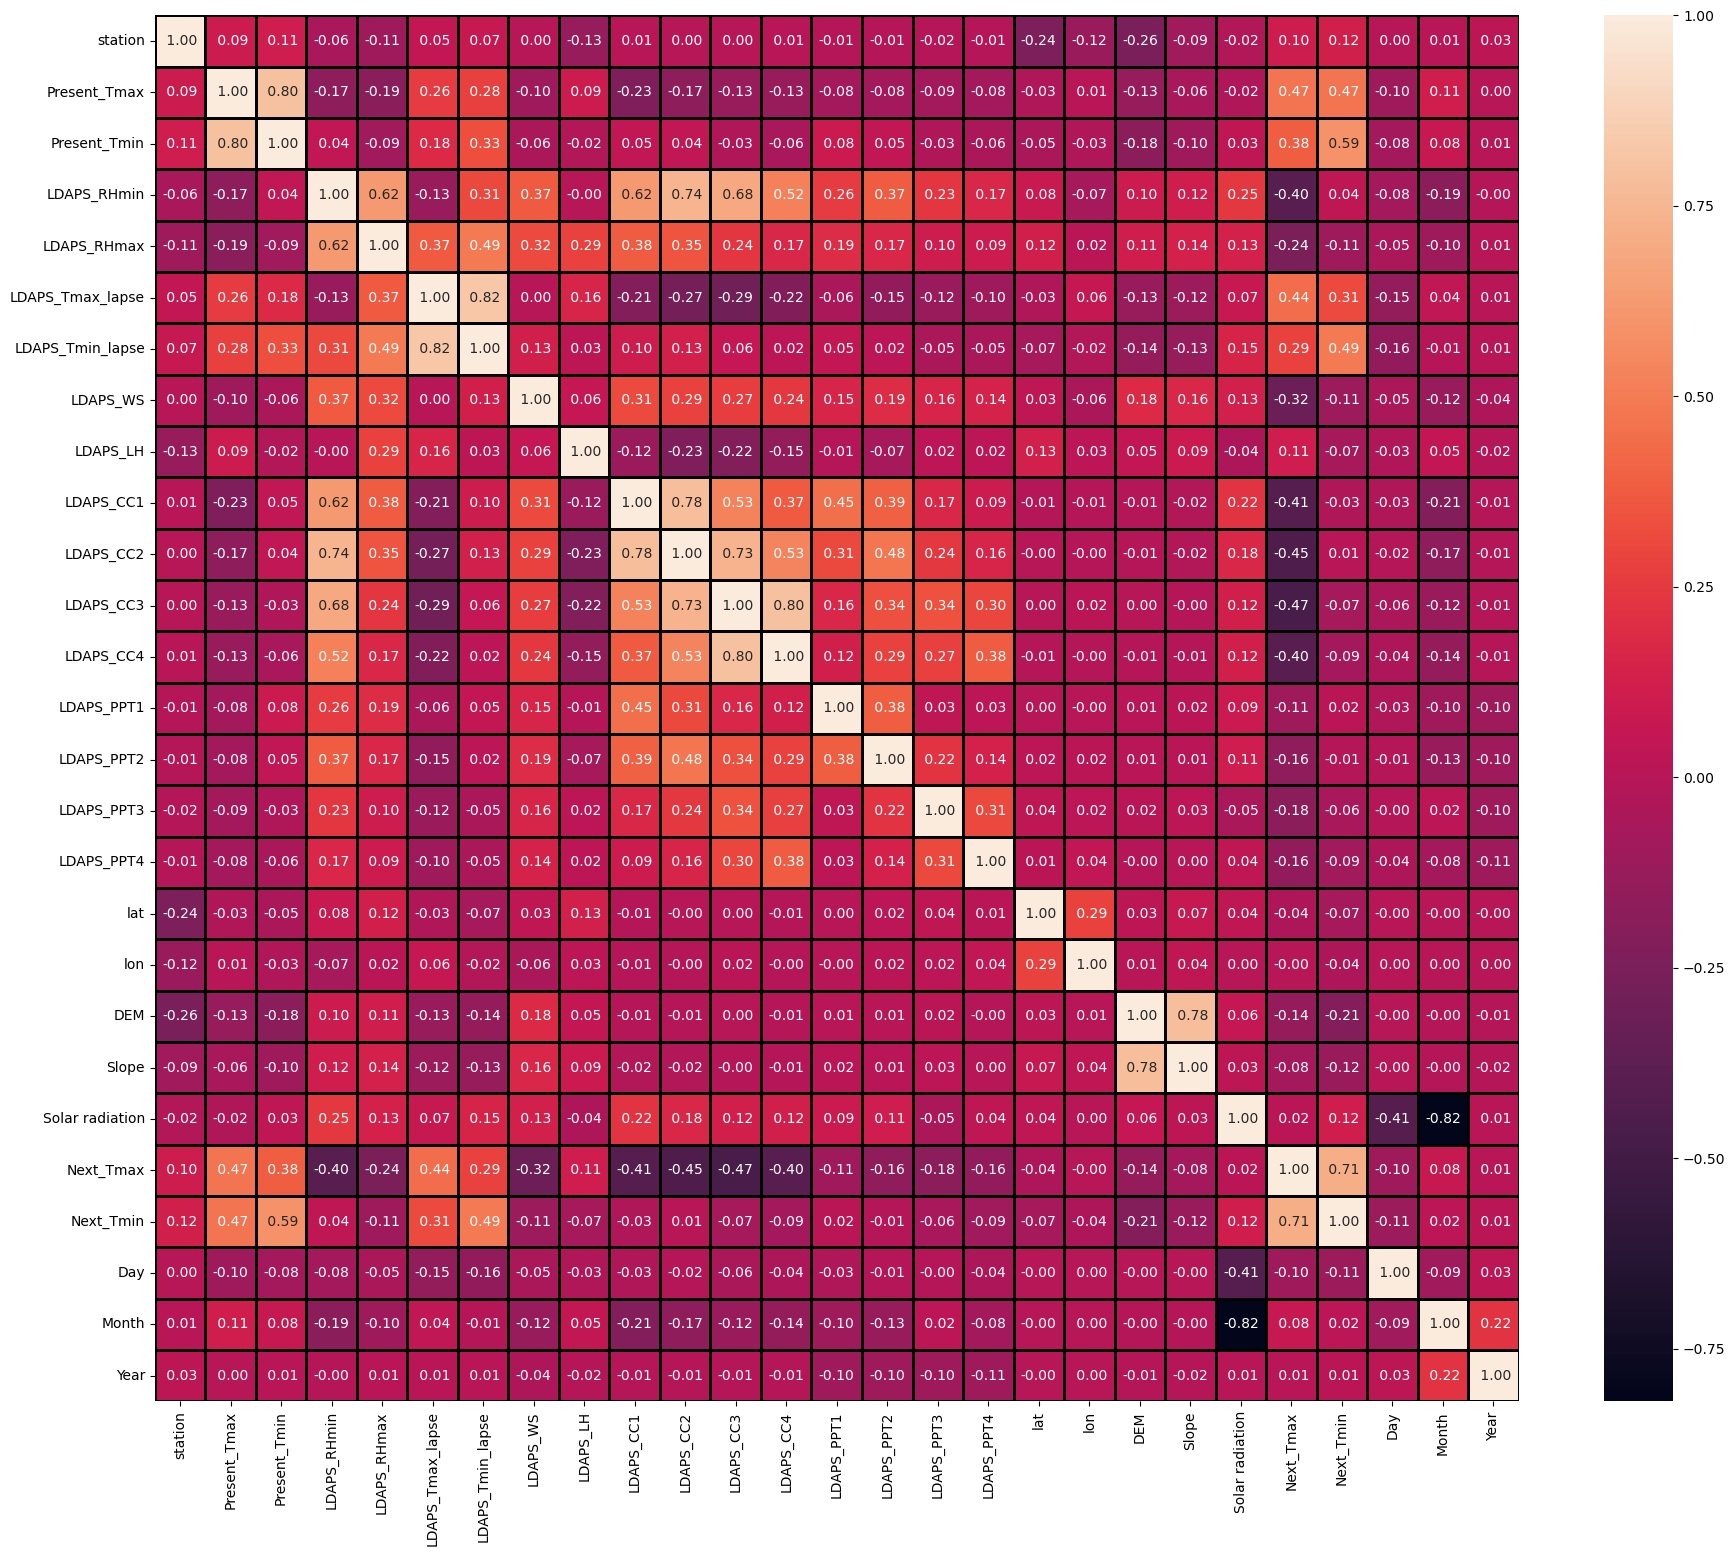

In [17]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

Comment -
* Present_Tmax & Prent_Tmin is highly correlated to Target Variable.
* LDAPS_Tmax_lapes & LDAPS_Tmin_lapes is also highly correlated to Target Variables.
* LDAPS_cc1,LDAPS_cc2,LDAPS_cc3 & LDAPS_cc4 are negativity correlated to target variables.

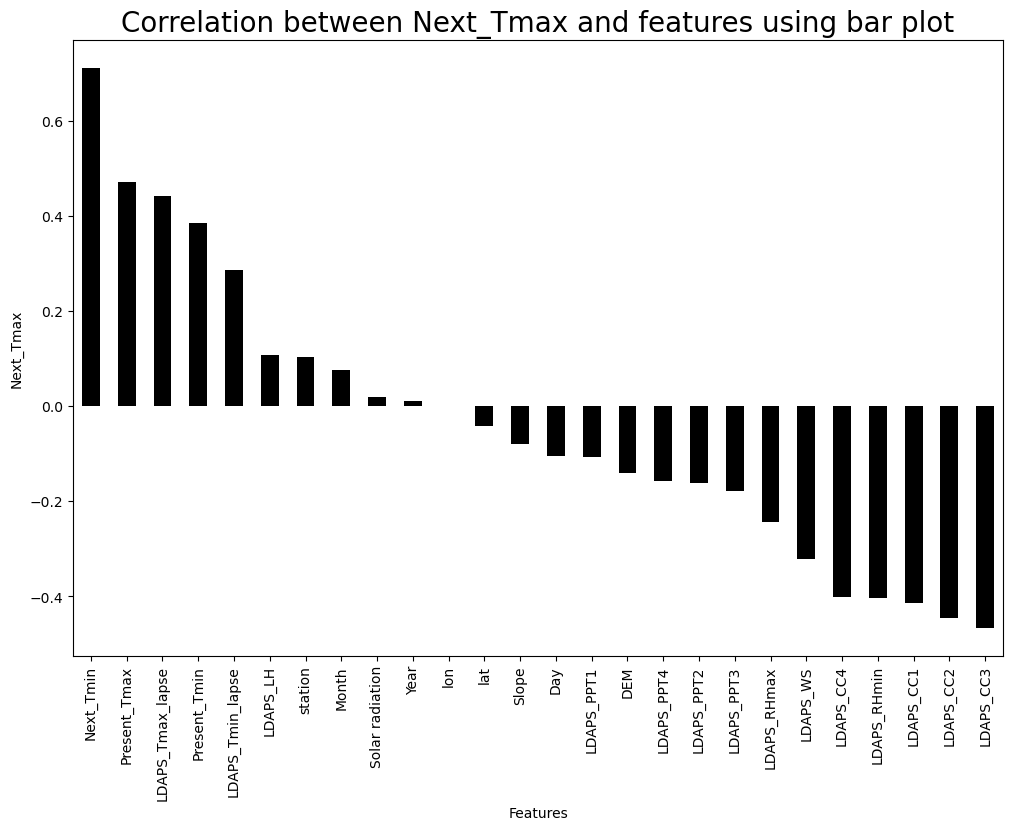

In [18]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmax',fontsize=10)
plt.title('Correlation between Next_Tmax and features using bar plot',fontsize=20)
plt.show()

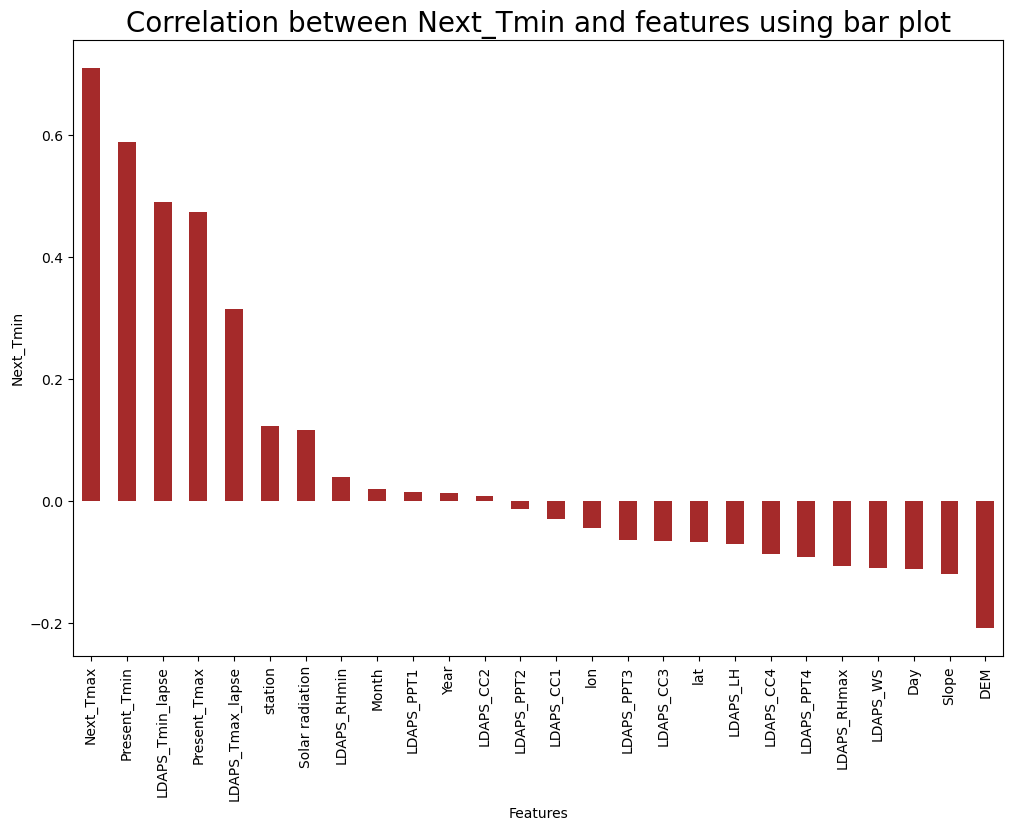

In [19]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmin',fontsize=10)
plt.title('Correlation between Next_Tmin and features using bar plot',fontsize=20)
plt.show()

# Outlier Detection

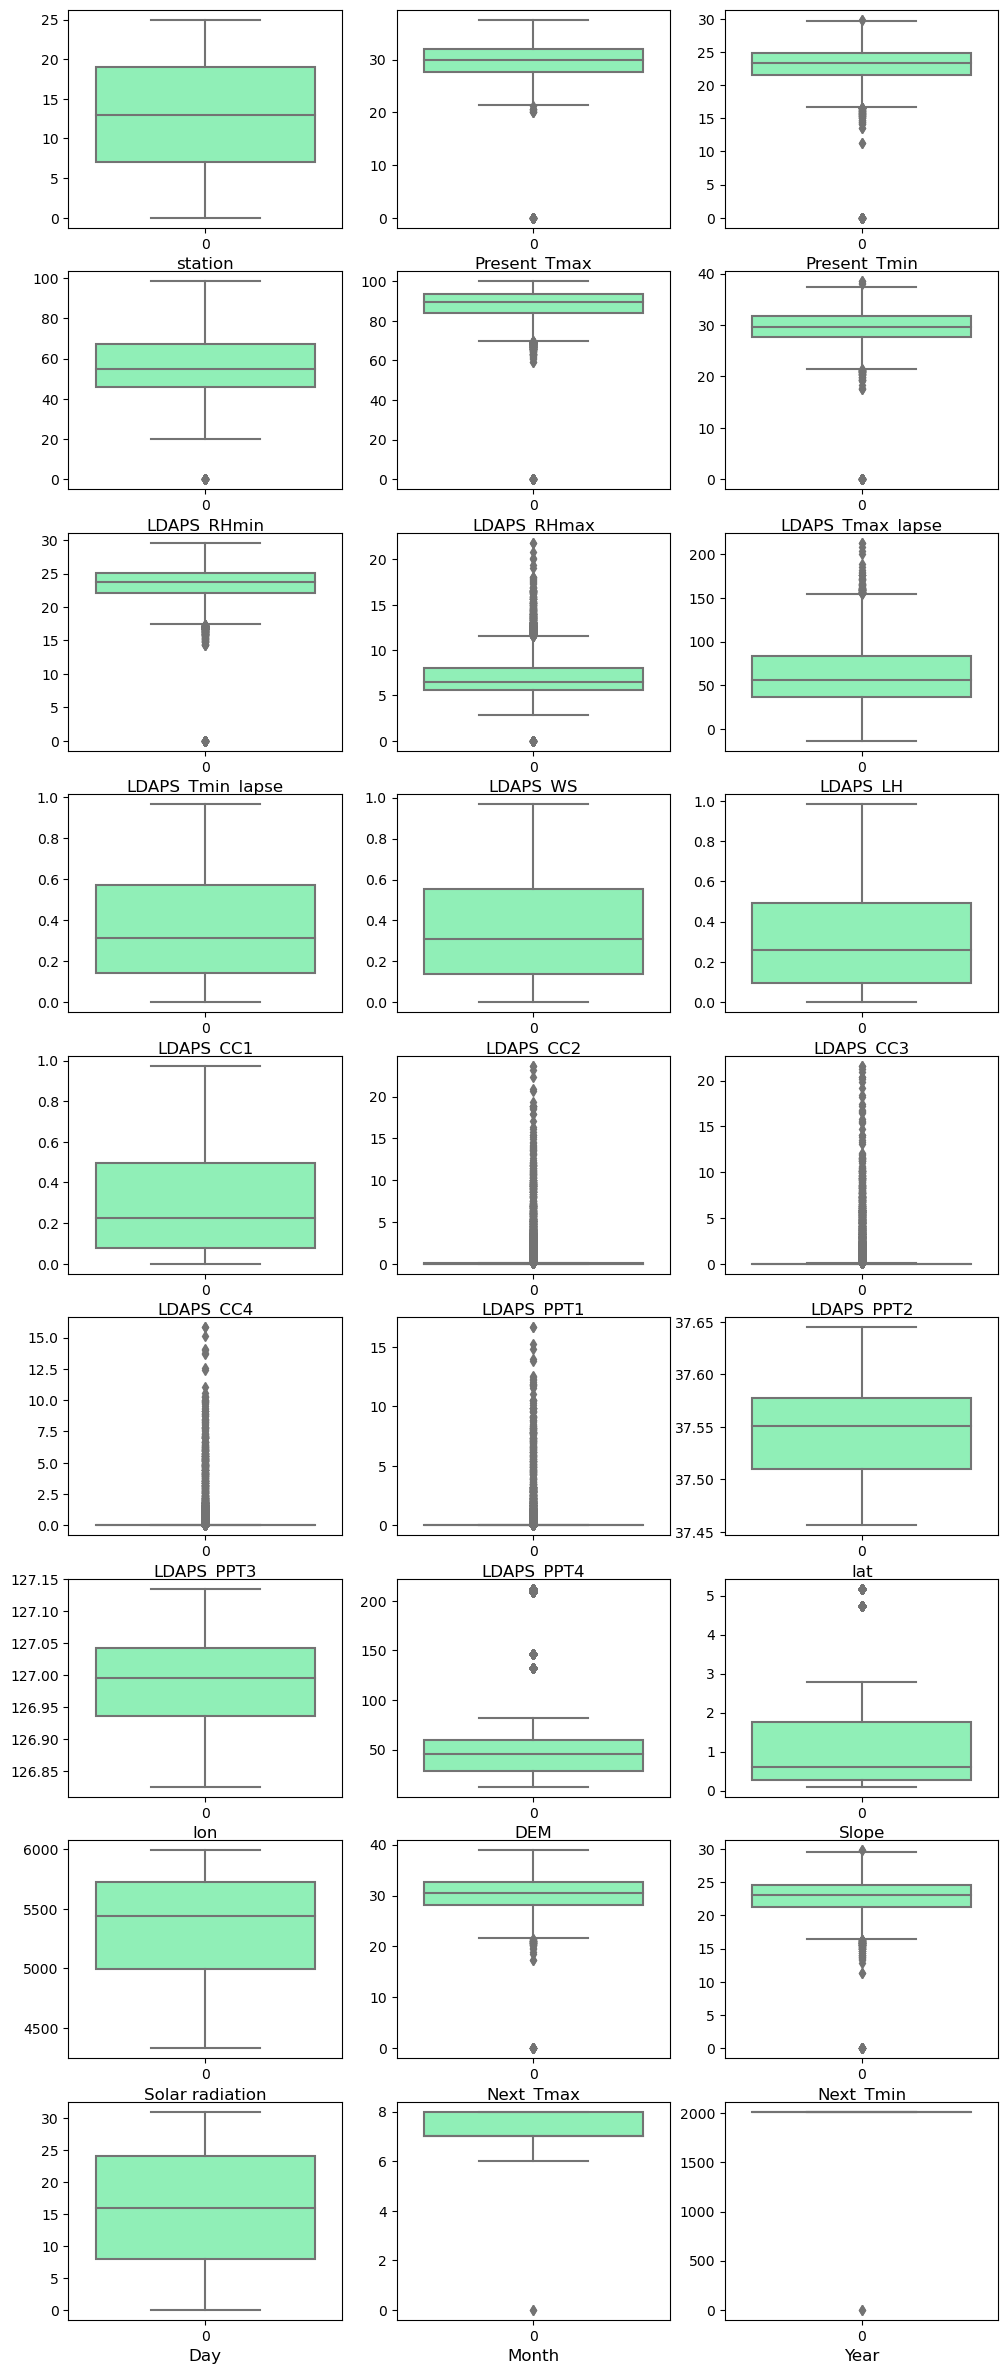

In [21]:
plt.figure(figsize=(12,30))
index=1
for column in df:
    if index <=27:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

# Removing of Outlier

In [22]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
        'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope',
       'Solar radiation', 'Month']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (e.g., 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# Checking Skewness of Dataset

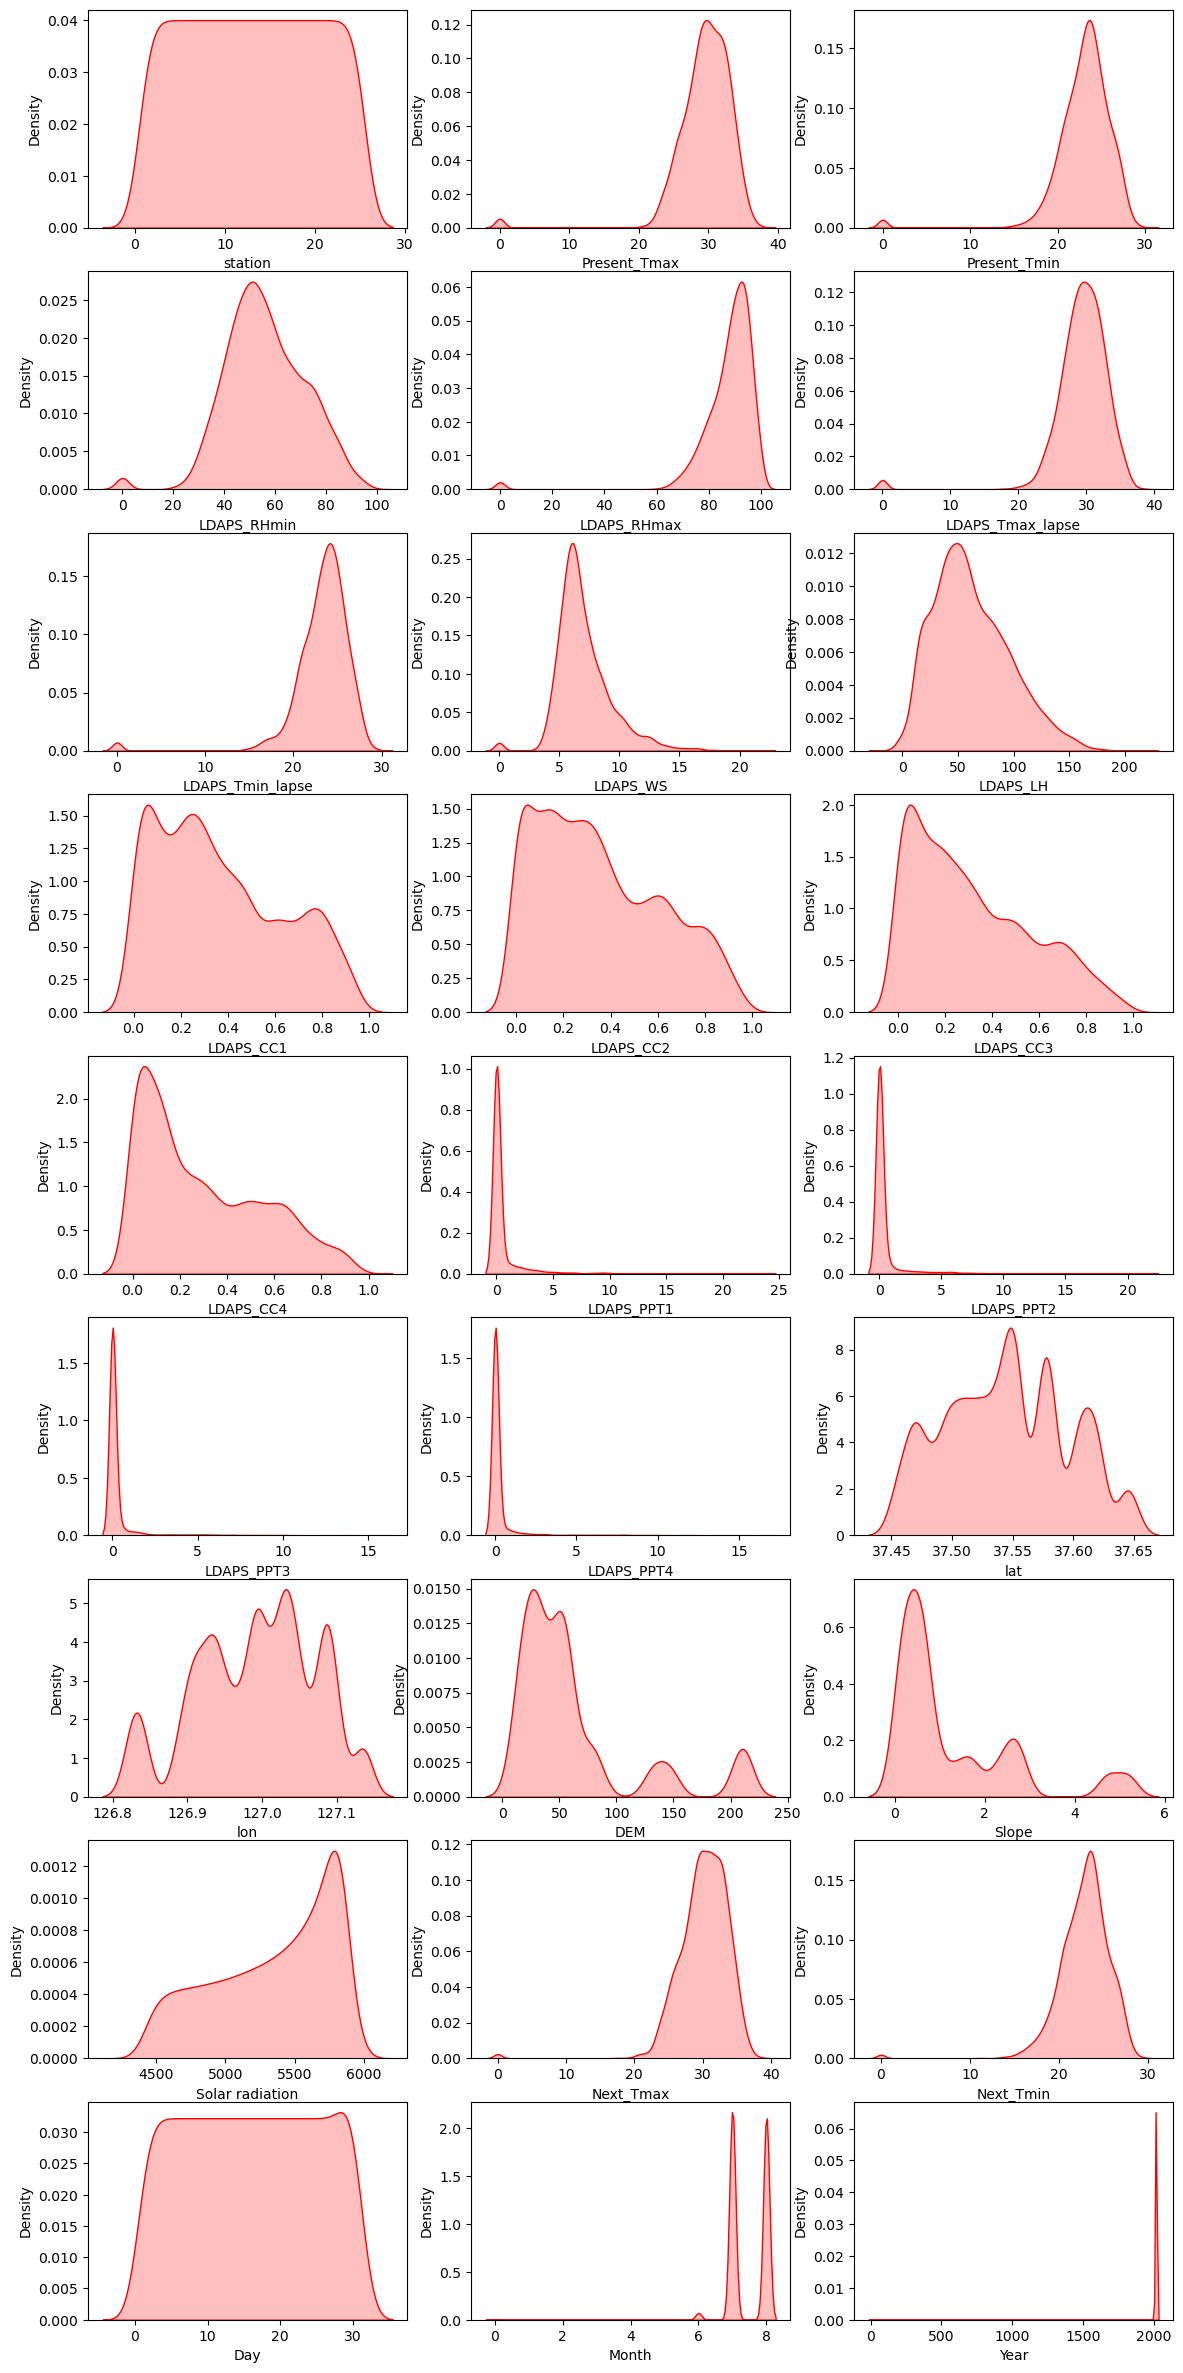

In [23]:
plt.figure(figsize=(14,30))
plotnumber=1
for column in df:
    if plotnumber <=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [24]:
df.skew()

station             -0.000115
Present_Tmax        -3.402987
Present_Tmin        -3.232442
LDAPS_RHmin         -0.113889
LDAPS_RHmax         -4.712138
LDAPS_Tmax_lapse    -3.457452
LDAPS_Tmin_lapse    -3.573353
LDAPS_WS             1.163684
LDAPS_LH             0.635208
LDAPS_CC1            0.460727
LDAPS_CC2            0.474379
LDAPS_CC3            0.643064
LDAPS_CC4            0.671739
LDAPS_PPT1           5.395178
LDAPS_PPT2           5.776835
LDAPS_PPT3           6.458608
LDAPS_PPT4           6.826930
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -2.213759
Next_Tmin           -2.049088
Day                 -0.009012
Month               -0.840039
Year               -62.067548
dtype: float64

* 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse',&,'LDAPS_Tmin_lapse' are left skewed.
* 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
   'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' are Right Skewed.

# Removing Skewness

In [25]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']
# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])


In [26]:
# columns with right-skewed data containing zeros
right_skewed_columns =  ['LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

# Spliting data into Feature and Target variable

In [27]:
feature_columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month', 'Year']
label_columns=['Next_Tmax']
labelcolumn=['Next_Tmin']

In [28]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Varience_inflation_factor
### Checking Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [31]:
vif

,VIF,Features
0,1.231416,station
1,2.947018,Present_Tmax
2,2.799932,Present_Tmin
3,6.343819,LDAPS_RHmin
4,2.856997,LDAPS_RHmax
5,5.498659,LDAPS_Tmax_lapse
6,6.711672,LDAPS_Tmin_lapse
7,1.360743,LDAPS_WS
8,1.551628,LDAPS_LH
9,5.059065,LDAPS_CC1


* 1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.
* VIF > 5: High multicollinearity.

# Machine learning Model  Next_Tmin

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [33]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)

In [34]:
X['LDAPS_LH'] = X['LDAPS_LH'].fillna(0)

# DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [36]:
dtr.fit(X_train, Y_train)

pred = dtr.predict(X_test)

# Evaluate the model using regression metrics
r2 = r2_score(Y_test, pred)

print("R-squared:", r2*100)

R-squared: 27.833534701925423


# RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

R-squared: 69.10125696483446


# LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train,Y_train)
pred3=rf.predict(X_test)
R4=r2_score(Y_test,pred3)
print("R-squared:", R4*100)

R-squared: 65.0631386901611


# XGBRegressor

In [39]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [40]:
xgb.fit(X_train, Y_train)

pred4 = xgb.predict(X_test)

# Evaluate the model using regression metrics
R5 = r2_score(Y_test, pred4)

print("R-squared:", R5*100)

R-squared: 65.43269251154959


# ExtraTreesRegressor

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

In [42]:
etr.fit(X_train, Y_train)

pred5 = etr.predict(X_test)

# Evaluate the model using regression metrics
R6 = r2_score(Y_test, pred5)

print("R-squared:", R6*100)


R-squared: 69.15197414286574


In [43]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()

In [44]:
br.fit(X_train, Y_train)

pred6 = br.predict(X_test)

# Evaluate the model using regression metrics
R7 = r2_score(Y_test, pred6)

print("R-squared:", R7*100)

R-squared: 64.39240876983425


# Cross Validation 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [46]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7056766981943249
Mean squared error : 2.3465438366294076
Root Mean Squared Error: 1.5318432807011975


 R2 Score :
0.691847887074005


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6620154772141013
Mean squared error : 2.367773604471195
Root Mean Squared Error: 1.5387571622810388


 R2 Score :
0.6890599579864445


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0146603611349956
Mean squared error : 5.870769561478934
Root Mean Squared Error: 2.4229670987198597


 R2 Score :
0.22904059296418677


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.9732286994251067
Mean squared error : 7.799213816511464
Root Mean Squared Error: 2.7927072557845127


 R2 Score :
-0.024205974422281118


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.7641401228579345
Mean squared error : 2.373378390593825
Root Mean Squared Error: 1.540577291340433


 R2 Score :
0.6883239279753164


 Error of  XGBReg

# Hyper Parameter Tuning : GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameter = {'n_estimators':[200,400],'gamma':np.arange(0,0.1),
              'booster' : ['gbtree','gblinear'], 'max_depth':[4,6],
              'eta' : [ 0.01, 0.1] }

In [49]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =5)

In [50]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.655 total time=   0.6s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.599 total time=   0.6s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.587 total time=   0.7s
[CV 4/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.563 total time=   0.7s
[CV 5/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.669 total time=   0.7s
[CV 1/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.683 total time=   1.5s
[CV 2/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.618 total time=   1.3s
[CV 3/5] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=400;, score=0.625 total time=   1.3s
[CV 4/5] END booster=gbtree, eta=0.

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'], 'eta': [0.01, 0.1],
                         'gamma': array([0.]), 'max_depth': [4, 6],
                         'n_estimators': [200, 400]},
             verbose=5)

In [51]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 400}

## Final Regression Model

In [52]:
Final_mod =  XGBRegressor(n_estimators=400 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
Y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,Y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5929833125166102
Mean squared error : 2.4213824547082874
Root Mean Squared Error: 1.5560791929424054


 R2 Score of Final Model :
0.6820199529312556




In [53]:
# Saving Model of NEXT Tmin
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast.pkl')

['Next_Tmin_Forecast.pkl']

In [55]:
# Prediction Based on Model
#Loading the saved model
Model = joblib.load("Next_Tmin_Forecast.pkl")

# prediction  DataFrame
actual = np.array(Y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted


,Actual Values,Predicted Values
0,25.3,25.387232
1,20.4,19.732224
2,25.1,25.262157
3,25.3,25.765524
4,16.8,16.667202
...,...,...
2321,20.9,20.813957
2322,22.6,22.478317
2323,24.6,21.438482
2324,21.2,21.003941


# Machine learning Model  Next_Tmax

In [56]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [57]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,BR,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred))
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.910972914875322
Mean squared error : 4.698177028804814
Root Mean Squared Error: 2.167527861136925


 R2 Score :
0.6220774186048856


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.7887055030094579
Mean squared error : 4.035482064918315
Root Mean Squared Error: 2.008850931482552


 R2 Score :
0.6753847737543446


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.328030954428203
Mean squared error : 11.10689595872743
Root Mean Squared Error: 3.332701000499059


 R2 Score :
0.10655840206237133


 Error of  BaggingRegressor() :
Mean absolute error : 0.9624935511607912
Mean squared error : 4.600305073086845
Root Mean Squared Error: 2.144832178303665


 R2 Score :
0.6299502641627153


 Error of  AdaBoostRegressor() :
Mean absolute error : 2.4991734836539217
Mean squared error : 13.761302947993743
Root Mean Squared Error: 3.709623019660319


 R2 Score :
-0.1069627861147282


 Error of  GradientBoostingRegres

# Hyper Parameter Tuning : GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    }
gsc = GridSearchCV(ExtraTreesRegressor(),parameter,verbose =5)

In [59]:
gsc.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.639 total time=   1.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.669 total time=   1.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.637 total time=   1.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.632 total time=   1.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.726 total time=   1.2s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.646 total time=   2.6s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.686 total time=   2.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.650 total time=   2.4s


GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             verbose=5)

In [ ]:
gsc.best_params_

In [ ]:
Final_mod =  ExtraTreesRegressor(max_depth= 20,min_samples_leaf= 2,min_samples_split= 3,n_estimators= 50)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred))
print('\n')

# Final Model Saving of Next_Tmax

In [ ]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast.pkl')

In [ ]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast.pkl")

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted1 = np.array(Model.predict(X_test))
df_Predicted1 = pd.DataFrame({"Actual Values":actual,"Predicted Values ":predicted1},index= range(len(actual)))
df_Predicted1